In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import csv
import seaborn as sb

In [2]:
# Processing the .csv file into the dataframe
df_cancerclassification=pd.read_csv("wdbc.csv",names = ['ID','Diagnosis','Radius_Mean','Texture_Mean','Perimeter_Mean','Area_Mean','Smoothness_Mean','Compactness_Mean','Concavity_Mean','Concave_Point_Mean','Symmetry_Mean','Fractal_Dimension_Mean','Radius_Standard_Error','Texture_Standard_Error','Perimeter_Standard_Error','Area_Standard_Error','Smoothness_Standard_Error','Compactness_Standard_Error','Concavity_Standard_Error','Concave_Points_Standard_Error','Symmetry_Standard_Error','Fractionaldimension_Standard_Error','Radius_Worst','Texture_Worst','Perimeter_Worst','Area_Worst','Smoothness_Worst','Compactness_Worst','Concavity_Worst','Concave_Points_Worst','Symmetry_Worst','Fractional_Dimension_Worst'])
df_cancerclassification

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Standard_Error,Texture_Standard_Error,Perimeter_Standard_Error,Area_Standard_Error,Smoothness_Standard_Error,Compactness_Standard_Error,Concavity_Standard_Error,Concave_Points_Standard_Error,Symmetry_Standard_Error,Fractionaldimension_Standard_Error,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
def predict(weight, bias, Z_t):
   
    Z = Z_t
    m = Z.shape[1]
    Y_prediction = np.zeros((1,m))
    S = sigmoid(np.dot(weight.T, Z) + bias)
    for i in range(S.shape[1]):
        Y_prediction[0, i] = 1 if S[0, i] > 0.5 else 0
       
    return Y_prediction

In [4]:
# Dropping the column "Id" from the data
df_cancerclassification = df_cancerclassification.drop("ID",axis=1)
df_cancerclassification

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Standard_Error,Texture_Standard_Error,Perimeter_Standard_Error,Area_Standard_Error,Smoothness_Standard_Error,Compactness_Standard_Error,Concavity_Standard_Error,Concave_Points_Standard_Error,Symmetry_Standard_Error,Fractionaldimension_Standard_Error,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df_cancerclassification.corr()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Standard_Error,Texture_Standard_Error,Perimeter_Standard_Error,Area_Standard_Error,Smoothness_Standard_Error,Compactness_Standard_Error,Concavity_Standard_Error,Concave_Points_Standard_Error,Symmetry_Standard_Error,Fractionaldimension_Standard_Error,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
Radius_Mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Texture_Mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
Perimeter_Mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
Area_Mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
Smoothness_Mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
Compactness_Mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
Concavity_Mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
Concave_Point_Mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
Symmetry_Mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
Fractal_Dimension_Mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


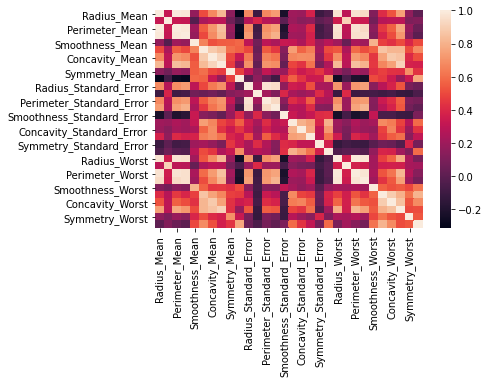

In [6]:
sb.heatmap(df_cancerclassification.corr())

In [7]:
#mapping the column "Diagnosis" from M to 1 and B to 0
df_cancerclassification['Diagnosis']=df_cancerclassification['Diagnosis'].map({'M' : 1,'B': 0})
df_cancerclassification

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Standard_Error,Texture_Standard_Error,Perimeter_Standard_Error,Area_Standard_Error,Smoothness_Standard_Error,Compactness_Standard_Error,Concavity_Standard_Error,Concave_Points_Standard_Error,Symmetry_Standard_Error,Fractionaldimension_Standard_Error,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
x1 = df_cancerclassification.drop(['Diagnosis'], axis = 1)
y = df_cancerclassification['Diagnosis'].values


In [9]:
#Normalizing the data
x = (x1 - np.min(x1))/(np.max(x1) - np.min(x1)).values 
x

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Standard_Error,Texture_Standard_Error,Perimeter_Standard_Error,Area_Standard_Error,Smoothness_Standard_Error,Compactness_Standard_Error,Concavity_Standard_Error,Concave_Points_Standard_Error,Symmetry_Standard_Error,Fractionaldimension_Standard_Error,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [10]:
# Partitioning the 80% of data into Training data and 20% to test data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 
print(' The size of the training "X" is', x_train.shape)
print(' The size of the testing "X" is', x_test.shape)
print(' The size of the training "Y" is', y_train.shape)
print(' The size of the testing "Y" is', y_test.shape)

 The size of the training "X" is (455, 30)
 The size of the testing "X" is (114, 30)
 The size of the training "Y" is (455,)
 The size of the testing "Y" is (114,)


In [11]:
#Partitioning the 20% of the test data into 10% of validation and 10% of test data
x_test, x_validation, y_test, y_validation = train_test_split(x_test,y_test, test_size=0.5, random_state=1)
print(' The size of the testing "Y" is', y_test.shape)
print(' The size of the validation "Y" is', y_validation.shape)
print(' The size of the testing "X" is', x_test.shape)
print(' The size of the validation "X" is', x_validation.shape)

 The size of the testing "Y" is (57,)
 The size of the validation "Y" is (57,)
 The size of the testing "X" is (57, 30)
 The size of the validation "X" is (57, 30)


In [12]:
x_train = x_train.T 
x_test = x_test.T 
y_train = y_train.T 
y_test = y_test.T 
x_validation = x_validation.T
y_validation = y_validation.T

##Reshape the Y to have proper shape
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])
y_validation = y_validation.reshape(1, y_validation.shape[0])

print(y_validation.shape)

(1, 57)


In [13]:
# Logistic Regression
import sklearn.datasets
epochs=15000
learning_rate= 0.05
def sigmoid(z):
    return 1/(1+np.exp(-z))
losstrack = []
m = x_train.shape[1]
w = np.zeros((30,1))
b=0
for epoch in range(epochs):
    z=np.dot(w.T, x_train) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1-y_train),np.log(1-p)))/m
    losstrack.append(np.squeeze(cost))
    dz=p-y_train
    dw = (1/m)* np.dot(x_train, dz.T)
    db = (1/m)* np.sum(dz)
    w = w - learning_rate*dw
    b = b - learning_rate*db

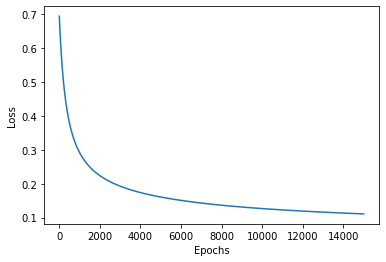

In [14]:
#Plotting
%matplotlib inline
plt.plot(losstrack)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [15]:
Y_prediction_validation = predict(w, b, x_validation)
print('Validation accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_validation - y_validation)) * 100))

Validation accuracy: 96.49122807017544 %


In [16]:
Y_prediction_test = predict(w, b, x_test)
print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
print(Y_prediction_test)

test accuracy: 96.49122807017544 %
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 1. 0.]]


In [17]:
Y_prediction_train = predict(w, b, x_train)
print('train accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))

train accuracy: 97.58241758241758 %


In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test.T,Y_prediction_test.T)
conf_matrix

array([[33,  1],
       [ 1, 22]])

In [19]:
TP=conf_matrix[0][0]
FN=conf_matrix[0][1]
FP=conf_matrix[1][0]
TN=conf_matrix[1][1]
print(TP)
print(FN)
print(FP)
print(TN)

33
1
1
22


In [20]:
accuracy=(TP+TN)/(TP+TN+FN+FP)
accuracy

0.9649122807017544

In [21]:
precision=(TP)/(TP+FP)
precision

0.9705882352941176

In [22]:
recall=(TP)/(TP+FN)
recall

0.9705882352941176

In [23]:
learning_rate= 0.005
for epoch in range(epochs):
    z=np.dot(w.T, x_train) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1-y_train),np.log(1-p)))/m
    losstrack.append(np.squeeze(cost))
    dz=p-y_train
    dw = (1/m)* np.dot(x_train, dz.T)
    db = (1/m)* np.sum(dz)
    w = w - learning_rate*dw
    b = b - learning_rate*db


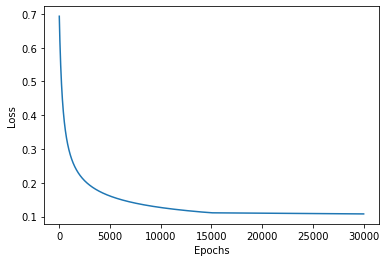

In [24]:
%matplotlib inline
plt.plot(losstrack)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

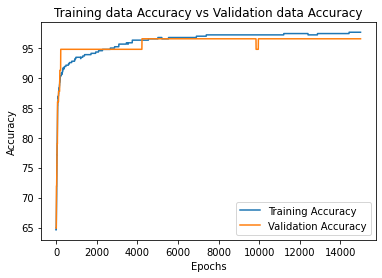

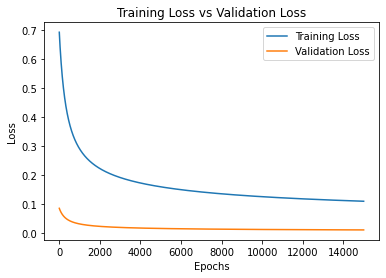

In [25]:
epochs=15000
learning_rate= 0.05

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
def accuracyplot(train_accuracy, val_accuracy, label):
    plt.plot(train_accuracy, label= 'Training Accuracy')
    plt.plot(val_accuracy, label= 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training data Accuracy vs Validation data Accuracy')
    plt.legend()
    plt.show()
    
def lossplot(train_loss, val_loss, label):
    plt.plot(train_loss, label= 'Training Loss')
    plt.plot(val_loss, label= 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.legend()
    plt.show()
m = x_train.shape[1]
w = np.zeros((30,1))
b=0
losstrack = []
valLoss = []
trainAccuracy = []
valAccuracy = []
label = " "
for epoch in range(epochs):
   
    z = np.dot(w.T, x_train) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1-y_train),np.log(1-p)))/m
    losstrack.append(np.squeeze(cost))
    dz = p - y_train
    dw = (1/m)* np.dot(x_train, dz.T)
    db = (1/m)* np.sum(dz)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    z1 = np.dot(w.T, x_validation) + b
    p1 = sigmoid(z1)
    validation_cost = -np.sum(np.multiply(np.log(p1), y_validation) + np.multiply((1-y_validation),np.log(1-p1)))/m
    valLoss.append(np.squeeze(validation_cost))
    Y_prediction_train = predict(w, b, x_train)
    Y_prediction_val = predict(w, b, x_validation)
    Y_prediction_train = Y_prediction_train.astype(int)[0]
    Y_prediction_val = Y_prediction_val.astype(int)[0]
    train_accuracy = ((100 - np.mean(np.abs(Y_prediction_train -  y_train[0])) * 100))
    val_accuracy = ((100 - np.mean(np.abs(Y_prediction_val -  y_validation[0])) * 100))
    trainAccuracy.append(train_accuracy)
    valAccuracy.append(val_accuracy)
accuracyplot(trainAccuracy, valAccuracy, learning_rate)
lossplot(losstrack, valLoss, learning_rate)

In [26]:
Y_prediction_test = predict(w, b, x_test)
print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

test accuracy: 96.49122807017544 %
